In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("G:\\GitHub\\diggi-teste\\estudo_de_caso_diggi\\dados\\base_teste_ok.csv", sep=';', encoding="utf_8")

In [3]:
data.head()

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN


In [4]:
arr_cols_flag = ['30D3M','60D6M','60D9M','90D9M','90D12M']

for f in arr_cols_flag:
    col_flag = []
    for i in data['Performance ' + f + ' EVER'].iteritems():
        valor = (i[1])
        if valor == 'BOM':
            col_flag.append(1)
        elif valor == 'MAU':
            col_flag.append(0)
        else:
            col_flag.append(None)

    data[f] = col_flag

In [5]:
flag_divida = []
for i in data['Endividamento'].iteritems():
  valor = (i[1])
  if valor == 'Até 25%':
    flag_divida.append(0.25)
  elif valor == '26 a 50%':
    flag_divida.append(0.5)
  elif valor == '51 a 75%':
    flag_divida.append(0.75)
  elif valor == '76 a 100%':
    flag_divida.append(1)
  elif valor == 'Acima de 100%':
    flag_divida.append(1.5)
  else:
    flag_divida.append(None)

data['% Endividamento'] = flag_divida

In [6]:
# Se o valor da renda mensal for menor ou igual a ??? este será baixo, senão se for menor que ??? será médio, senão será alto.
categorias_renda_mensal = []
# alimentando a lista categorias
for i in data['Renda Mensal'].iteritems():
  valor = (i[1])
  if valor <= 2500:
    categorias_renda_mensal.append('Baixo')
  elif valor < 5000:
    categorias_renda_mensal.append('Medio')
  else:
    categorias_renda_mensal.append('Alto')

data['categorias_renda_mensal'] = categorias_renda_mensal

In [7]:
data.head(5)

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,...,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento,categorias_renda_mensal
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,...,MAU,MAU,MAU,1.0,0.0,0.0,0.0,0.0,0.50,Baixo
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,BOM,BOM,BOM,1.0,1.0,1.0,1.0,1.0,0.25,Alto
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,...,BOM,BOM,BOM,1.0,1.0,1.0,1.0,1.0,1.50,Medio
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,MAU,BOM,MAU,0.0,1.0,0.0,1.0,0.0,0.25,Baixo
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0.25,Baixo


In [11]:
data.describe()

,Nº do cliente,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento,endividamento_bom
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8335.000000,8335.000000,3995.000000,10000.000000,11994.0
mean,6.101154e+08,2780.155700,0.164900,0.711100,1635.66340,0.152900,209.724300,459.182800,524.183800,483.280100,695.888500,0.875600,0.829000,0.766647,0.812238,0.766458,0.445825,0.0
std,3.515864e+08,1464.592111,1.564146,1.823285,10741.23154,1.173908,2700.805532,264.013507,200.494433,215.561897,115.237171,0.330054,0.376528,0.422991,0.390546,0.423137,0.422184,0.0
min,1.241258e+06,1041.000000,0.000000,-7.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.0
25%,3.056783e+08,1404.000000,0.000000,0.000000,0.00000,0.000000,0.000000,216.000000,253.000000,277.000000,630.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.0
50%,6.101154e+08,3365.000000,0.000000,0.000000,0.00000,0.000000,0.000000,481.000000,627.000000,482.000000,700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.0
75%,9.145524e+08,3492.000000,0.000000,1.000000,145.00000,0.000000,0.000000,672.250000,669.000000,669.000000,772.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.0
max,1.218989e+09,33564.000000,64.000000,35.000000,462266.00000,37.000000,133742.000000,999.000000,811.000000,922.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,0.0


In [9]:
data['% Endividamento'].value_counts().sort_index()

0.25    7850
0.50     422
0.75     287
1.00     184
1.50    1257
Name: % Endividamento, dtype: int64

In [10]:
data['endividamento_bom'] = data['% Endividamento'].map(lambda x: 1 if x < 0.25 else 0)

In [12]:
data = data[0:10000]

In [13]:
select_columns = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4',
    '30D3M','60D6M','60D9M','90D9M','90D12M', '% Endividamento', 'endividamento_bom']
data = data.filter(items=select_columns)

In [14]:
data.head()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento,endividamento_bom
0,1076.0,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,1.0,0.0,0.0,0.0,0.0,0.50,0
1,12709.0,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,1.0,1.0,1.0,1.0,1.0,0.25,0
2,2518.0,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,1.0,1.0,1.0,1.0,1.0,1.50,0
3,1090.0,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,0.0,1.0,0.0,1.0,0.0,0.25,0
4,1155.0,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,1.0,1.0,NaN,NaN,NaN,0.25,0


In [15]:
from lightgbm import LGBMClassifier

In [44]:
?LGBMClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop(['30D3M','60D6M','60D9M','90D9M','90D12M'], axis=1), data['30D3M'], train_size=0.5)

In [23]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((5000, 12), (5000, 12), (5000,), (5000,))

In [24]:
Xtrain.head()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,% Endividamento,endividamento_bom
3956,4149.0,0.0,0.0,0.0,0.0,0.0,589.0,595.0,559.0,819.0,0.25,0
896,1469.0,0.0,2.0,1044.0,0.0,0.0,139.0,218.0,219.0,482.0,1.00,0
4313,3365.0,0.0,1.0,755.0,0.0,0.0,134.0,219.0,258.0,659.0,0.50,0
4442,3492.0,0.0,0.0,0.0,0.0,0.0,473.0,667.0,469.0,727.0,0.25,0
9180,3492.0,0.0,0.0,0.0,0.0,0.0,858.0,682.0,766.0,760.0,0.25,0


In [25]:
mdl = LGBMClassifier(random_state=0)
mdl.fit(Xtrain, ytrain)

LGBMClassifier(random_state=0)

In [26]:
from sklearn.metrics import roc_auc_score
p = mdl.predict_proba(Xtest)[:, 1]

In [27]:
roc_auc_score(ytest, p)

0.7110169120842529

#### Random search - busca aleatória
1, 2, 3, 4, 5 - [1,2,3,4,5] -> [2], [5]

In [33]:
!pip install scikit-optimize

In [34]:
!pip install skopt

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [35]:
from skopt import dummy_minimize

In [36]:
?dummy_minimize

In [37]:
def treinar_modelo(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1, 
                         n_estimators=100)
    mdl.fit(Xtrain, ytrain)
    
    p = mdl.predict_proba(Xtest)[:,1]
    
    return -roc_auc_score(ytest, p)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2540
Function value obtained: -0.6709
Current minimum: -0.6709
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1200
Function value obtained: -0.7327
Current minimum: -0.7327
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3200
Function value obtained: -0.7235
Current minimum: -0.7327
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [38]:
resultado.x

[0.014347598955915168, 84, 87, 0.27517563123087635, 0.9130415685060285]

### Bayesian Optimization

In [39]:
from skopt import gp_minimize

In [40]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3690
Function value obtained: -0.6714
Current minimum: -0.6714
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1850
Function value obtained: -0.7296
Current minimum: -0.7296
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1430
Function value obtained: -0.7343
Current minimum: -0.7343
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time ta

In [41]:
from skopt.plots import plot_convergence

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

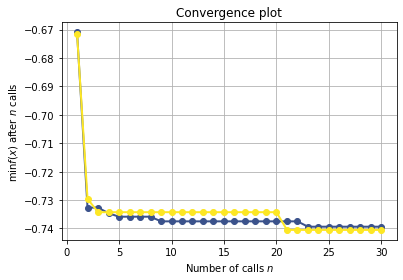

In [42]:
plot_convergence(resultado, resultados_gp)

### Exploration exploitation tradeoff

In [43]:
resultados_gp.x

[0.02961840368736345, 28, 100, 0.3979406921077059, 0.7505369153738466]